In [1]:
import dataretrieval.nwis as nwis

In [27]:
# specify the USGS site code for which we want data.
site = '07327550'
startDate = '2006-01-01'
endDate = '2013-12-31'


# get instantaneous values (iv)
df = nwis.get_record(sites=site, service='iv', start=startDate, end=endDate)
df

,00060,00060_cd,site_no,00065,00065_cd
datetime,,,,,
2006-01-01T00:00:00.000-06:00,10.0,"A, [91]",07327550,NaN,NaN
2006-01-01T00:15:00.000-06:00,10.0,"A, [91]",07327550,NaN,NaN
2006-01-01T00:30:00.000-06:00,10.0,"A, [91]",07327550,NaN,NaN
2006-01-01T00:45:00.000-06:00,10.0,"A, [91]",07327550,NaN,NaN
2006-01-01T01:00:00.000-06:00,10.0,"A, [91]",07327550,NaN,NaN
...,...,...,...,...,...
2013-12-30T05:30:00.000-06:00,NaN,NaN,07327550,6.87,A
2013-12-30T05:45:00.000-06:00,NaN,NaN,07327550,6.85,A
2013-12-30T06:00:00.000-06:00,NaN,NaN,07327550,6.85,A


<AxesSubplot: xlabel='datetime'>

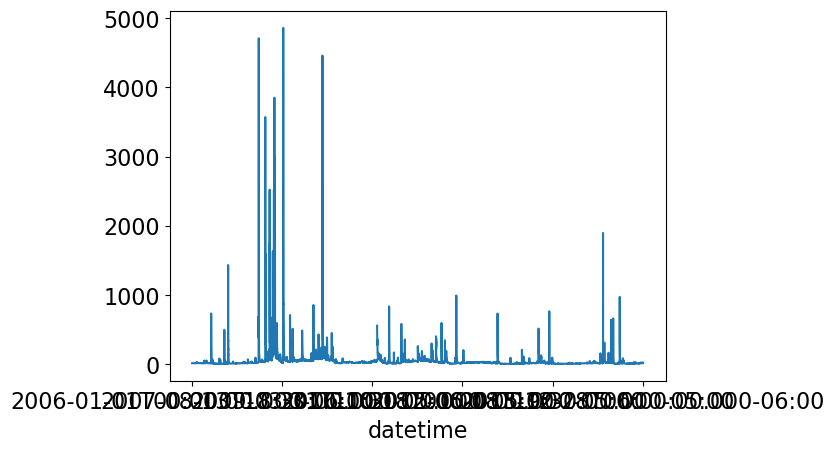

In [28]:
df['00060'].plot()

# https://help.waterdata.usgs.gov/codes-and-parameters/parameters
# https://help.waterdata.usgs.gov/code/parameter_cd_nm_query?parm_nm_cd=%25discharge%25&fmt=html
# 00060 is  a code for the discahrge
# Discharge, cubic feet per second, Stream flow, mean. daily
# 00065 is gage height, feet

<AxesSubplot: xlabel='datetime'>

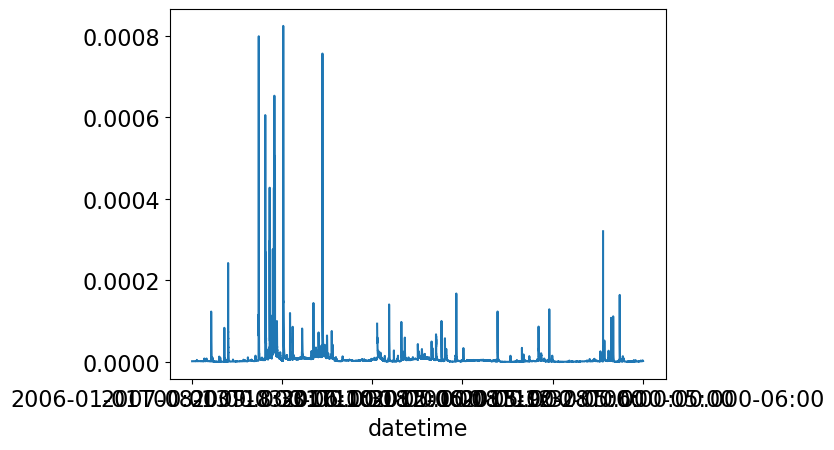

In [29]:
# Convert cubit feet per second -> meter per hour
area = 601 * 1E06 #(Picourlat et al., 2022), at USGS gauge. The entire watershed is 611 km2 https://www.ars.usda.gov/plains-area/el-reno-ok/grazinglands-research-laboratory/agroclimate-and-natural-resources-research/docs/little-washita-river-experimental-watershed/
df['Flow'] = df['00060'] * 0.028316847 * 3600 / area
df['Flow'].plot()

In [30]:
import pandas as pd
df['datetime'] = pd.to_datetime(df.index)

In [31]:
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)
df['datetime']

datetime
2006-01-01T00:00:00.000-06:00   2006-01-01 06:00:00+00:00
2006-01-01T00:15:00.000-06:00   2006-01-01 06:15:00+00:00
2006-01-01T00:30:00.000-06:00   2006-01-01 06:30:00+00:00
2006-01-01T00:45:00.000-06:00   2006-01-01 06:45:00+00:00
2006-01-01T01:00:00.000-06:00   2006-01-01 07:00:00+00:00
                                           ...           
2013-12-30T05:30:00.000-06:00   2013-12-30 11:30:00+00:00
2013-12-30T05:45:00.000-06:00   2013-12-30 11:45:00+00:00
2013-12-30T06:00:00.000-06:00   2013-12-30 12:00:00+00:00
2013-12-30T06:15:00.000-06:00   2013-12-30 12:15:00+00:00
2013-12-30T06:30:00.000-06:00   2013-12-30 12:30:00+00:00
Name: datetime, Length: 250195, dtype: datetime64[ns, UTC]

In [41]:
df.set_index(['datetime'], inplace=True)



In [45]:
rows_with_nan = df[['00060','Flow']][df[['00060','Flow']].isna().any(axis=1)]

# Verify the result
print(rows_with_nan)

                           00060  Flow
datetime                              
2008-05-23 05:00:00+00:00    NaN   NaN
2008-05-23 05:15:00+00:00    NaN   NaN
2008-05-23 05:30:00+00:00    NaN   NaN
2008-05-23 05:45:00+00:00    NaN   NaN
2008-05-23 06:00:00+00:00    NaN   NaN
...                          ...   ...
2013-12-30 11:30:00+00:00    NaN   NaN
2013-12-30 11:45:00+00:00    NaN   NaN
2013-12-30 12:00:00+00:00    NaN   NaN
2013-12-30 12:15:00+00:00    NaN   NaN
2013-12-30 12:30:00+00:00    NaN   NaN

[10727 rows x 2 columns]


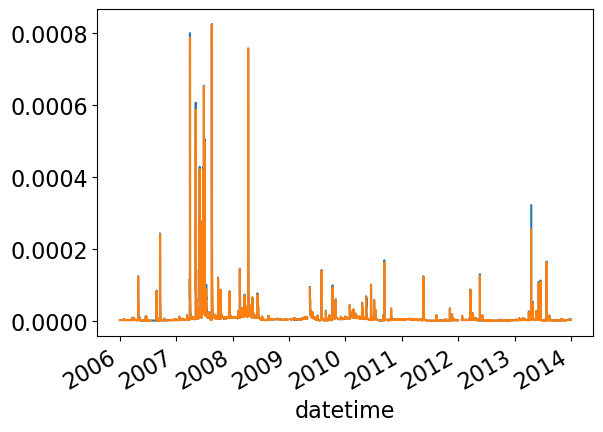

In [59]:
df_for_output = pd.DataFrame(df['Flow'], index=df.index)
# print(df_for_output.head())
# df_for_output.set_index(df_for_output['datetime'], inplace=True)
df_for_output['Flow'].plot()
df_for_output['Flow'].resample('H').mean().plot()

df_for_output2 = df_for_output['Flow'].resample('H').mean()
# df_for_output.rename({0: 'Flow'}, inplace=True)

numpy.ndarray

In [ ]:
df

In [7]:
out_path = r'G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\0_data\Little Washita\USGS_streamflow'
import os 
df.to_csv(os.path.join(out_path, f'discharge_{site}.csv'), index=True, header=True)


c:\Users\flipl\miniconda3\envs\py39\lib\site-packages\pandas\core\internals\blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


In [60]:
out_path = r'G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\0_data\Little Washita\data_ars_temp3'
import os 
df_for_output2.to_csv(os.path.join(out_path, f'Q.csv'), index=True, header=True)


c:\Users\flipl\miniconda3\envs\py39\lib\site-packages\pandas\core\internals\blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)
